## 1er Parcial - Simulación Computacional 2019-I

In [2]:
import numpy as np
import scipy as sp
from sympy import *
import math
import time
from random import random

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def showValues(I,X,U):
    print("i\tXi\tUi")
    for t in range(0, len(X)):
        print("%d\t%d\t%2.4f" % (I[t],X[t],U[t]), sep=' ', end='\n')

def tam_ciclo(values):
    tam = 1
    max_len = int(len(values) / 2)
    for ii in range(2, max_len):
        if (values[0:ii] == values[ii:2*ii]).any() :
            return ii
    
    return tam
        
def error_relativo_porcentual(vlr_real, vlr_medido):
    return abs((vlr_real-vlr_medido)/vlr_real)*100

def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<=P[t2]:
                V.append(X[t2])
                break
    return V

**1)** Para los siguientes generadores congruenciales mixtos encuentre $u_1,...,u_{100}$, el tamaño del ciclo (si lo tiene) y calcule el estadístico $\chi^2$

**(a)** $x_0=3, x_n = (5x_{n-1}+7) \mod 200$

In [196]:
N = 100

a = 5.0
b = 7.0
m = 200.0
x0 = 3.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)
print("El tamaño del ciclo es: "+str(tam_ciclo((np.array(X)).astype(int))))

i	Xi	Ui
1	22	0.1100
2	117	0.5850
3	192	0.9600
4	167	0.8350
5	42	0.2100
6	17	0.0850
7	92	0.4600
8	67	0.3350
9	142	0.7100
10	117	0.5850
11	192	0.9600
12	167	0.8350
13	42	0.2100
14	17	0.0850
15	92	0.4600
16	67	0.3350
17	142	0.7100
18	117	0.5850
19	192	0.9600
20	167	0.8350
21	42	0.2100
22	17	0.0850
23	92	0.4600
24	67	0.3350
25	142	0.7100
26	117	0.5850
27	192	0.9600
28	167	0.8350
29	42	0.2100
30	17	0.0850
31	92	0.4600
32	67	0.3350
33	142	0.7100
34	117	0.5850
35	192	0.9600
36	167	0.8350
37	42	0.2100
38	17	0.0850
39	92	0.4600
40	67	0.3350
41	142	0.7100
42	117	0.5850
43	192	0.9600
44	167	0.8350
45	42	0.2100
46	17	0.0850
47	92	0.4600
48	67	0.3350
49	142	0.7100
50	117	0.5850
51	192	0.9600
52	167	0.8350
53	42	0.2100
54	17	0.0850
55	92	0.4600
56	67	0.3350
57	142	0.7100
58	117	0.5850
59	192	0.9600
60	167	0.8350
61	42	0.2100
62	17	0.0850
63	92	0.4600
64	67	0.3350
65	142	0.7100
66	117	0.5850
67	192	0.9600
68	167	0.8350
69	42	0.2100
70	17	0.0850
71	92	0.4600
72	67	0.3350
73	142	0.7100
74	117	0.5850
75

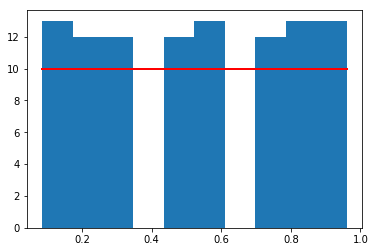

Estadístico chi2 = 25.199999999999996
25.2


In [197]:
import matplotlib.pyplot as plt
from scipy import stats

k=10
count, bins, ignored = plt.hist(U, k, normed=False)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**(b)** $x_0=123, x_n = (13x_{n-1}+3) \mod 16$

In [198]:
a = 13.0
b = 3.0
m = 16.0
x0 = 123.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)
print("El tamaño del ciclo es: "+str(tam_ciclo((np.array(X)).astype(int))))

i	Xi	Ui
1	2	0.1250
2	13	0.8125
3	12	0.7500
4	15	0.9375
5	6	0.3750
6	1	0.0625
7	0	0.0000
8	3	0.1875
9	10	0.6250
10	5	0.3125
11	4	0.2500
12	7	0.4375
13	14	0.8750
14	9	0.5625
15	8	0.5000
16	11	0.6875
17	2	0.1250
18	13	0.8125
19	12	0.7500
20	15	0.9375
21	6	0.3750
22	1	0.0625
23	0	0.0000
24	3	0.1875
25	10	0.6250
26	5	0.3125
27	4	0.2500
28	7	0.4375
29	14	0.8750
30	9	0.5625
31	8	0.5000
32	11	0.6875
33	2	0.1250
34	13	0.8125
35	12	0.7500
36	15	0.9375
37	6	0.3750
38	1	0.0625
39	0	0.0000
40	3	0.1875
41	10	0.6250
42	5	0.3125
43	4	0.2500
44	7	0.4375
45	14	0.8750
46	9	0.5625
47	8	0.5000
48	11	0.6875
49	2	0.1250
50	13	0.8125
51	12	0.7500
52	15	0.9375
53	6	0.3750
54	1	0.0625
55	0	0.0000
56	3	0.1875
57	10	0.6250
58	5	0.3125
59	4	0.2500
60	7	0.4375
61	14	0.8750
62	9	0.5625
63	8	0.5000
64	11	0.6875
65	2	0.1250
66	13	0.8125
67	12	0.7500
68	15	0.9375
69	6	0.3750
70	1	0.0625
71	0	0.0000
72	3	0.1875
73	10	0.6250
74	5	0.3125
75	4	0.2500
76	7	0.4375
77	14	0.8750
78	9	0.5625
79	8	0.5000
80	11	0.6875
81	2	0.1250

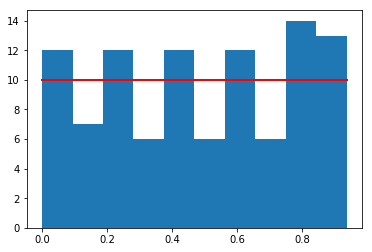

Estadístico chi2 = 9.8
9.8


In [200]:
import matplotlib.pyplot as plt
from scipy import stats

k=10
count, bins, ignored = plt.hist(U, k, normed=False)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**(c)** $x_0=7, x_n = (5x_{n-1}+3) \mod 33$

In [201]:
a = 5.0
b = 3.0
m = 33.0
x0 = 7.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)
print("El tamaño del ciclo es: "+str(tam_ciclo((np.array(X)).astype(int))))

i	Xi	Ui
1	5	0.1515
2	28	0.8485
3	11	0.3333
4	25	0.7576
5	29	0.8788
6	16	0.4848
7	17	0.5152
8	22	0.6667
9	14	0.4242
10	7	0.2121
11	5	0.1515
12	28	0.8485
13	11	0.3333
14	25	0.7576
15	29	0.8788
16	16	0.4848
17	17	0.5152
18	22	0.6667
19	14	0.4242
20	7	0.2121
21	5	0.1515
22	28	0.8485
23	11	0.3333
24	25	0.7576
25	29	0.8788
26	16	0.4848
27	17	0.5152
28	22	0.6667
29	14	0.4242
30	7	0.2121
31	5	0.1515
32	28	0.8485
33	11	0.3333
34	25	0.7576
35	29	0.8788
36	16	0.4848
37	17	0.5152
38	22	0.6667
39	14	0.4242
40	7	0.2121
41	5	0.1515
42	28	0.8485
43	11	0.3333
44	25	0.7576
45	29	0.8788
46	16	0.4848
47	17	0.5152
48	22	0.6667
49	14	0.4242
50	7	0.2121
51	5	0.1515
52	28	0.8485
53	11	0.3333
54	25	0.7576
55	29	0.8788
56	16	0.4848
57	17	0.5152
58	22	0.6667
59	14	0.4242
60	7	0.2121
61	5	0.1515
62	28	0.8485
63	11	0.3333
64	25	0.7576
65	29	0.8788
66	16	0.4848
67	17	0.5152
68	22	0.6667
69	14	0.4242
70	7	0.2121
71	5	0.1515
72	28	0.8485
73	11	0.3333
74	25	0.7576
75	29	0.8788
76	16	0.4848
77	17	0.5152
78	22	0.6667
79

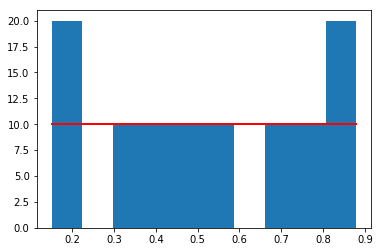

Estadístico chi2 = 40.0
40.0


In [202]:
import matplotlib.pyplot as plt
from scipy import stats

k=10
count, bins, ignored = plt.hist(U, k, normed=False)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**2)** Para las siguientes integrales, use simulación con el generado congruencial mixto $x_0=6789, x_n = (25214903917 x_{n-1}+11) \mod 2^{48}-1$ para aproximar el valor de las integrales para $N=100, 1000, 10000$, y compare su estimación con el valor real calculando el error relativo porcentual:

**(a)** $\int_{0}^{1}e ^{sin(x)}dx$

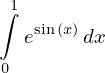

In [3]:
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x = Symbol('x')
e = integrate(exp(sin(x)), (x,0,1))
e

In [4]:
e.n()

In [18]:
#a
def integralA(n):
    suma = 0
    xo = 6789
    xx=0
    yi=0
    [Ii,xi, ui] = genranN(25214903917, 11, (2**48)-1, xo, n)
    for i in range(n):
        xx = ui[i]
        yi = math.exp(math.sin(xx))
        suma+=yi
    return suma/n
    #print("Aproximación de MonteCarlo : ",suma/n)

vlr_real = e.n()
print("Valor real="+str(vlr_real))

arr=[100,1000,10000]
for i in range(0,len(arr)):
    n=arr[i]
    vlr_medido=integralA(n)
    print("N="+str(n)+"\t"+"Aprox. MC="+str(vlr_medido)+"\t error relativo porc.="+str(error_relativo_porcentual(vlr_real, vlr_medido)))

Valor real=1.63186960841805
N=100	Aprox. MC=1.5655187208990082	 error relativo porc.=4.06594296362711
N=1000	Aprox. MC=1.6255006882031207	 error relativo porc.=0.390283646565654
N=10000	Aprox. MC=1.6354946577524685	 error relativo porc.=0.222140869326647


**(b)** $\int_{-3}^{3}e^{sin(x)-x^{3}}dx$

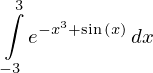

In [33]:
e = Integral(exp(sin(x)-x**3), (x,-3,3))
e

In [34]:
e.n()

In [35]:
#b
def integralB(n):
    a = -3
    b = 3
    suma = 0
    xo = 6789
    [Ii,xi, ui] = genranN(25214903917, 11, (2**48)-1, xo, n)
    for i in range(n):
        xx = ui[i]*(b-a)+a
        y = (b-a)*math.exp(math.sin(xx)-(xx**3))
        suma+=y
    return suma/n
    #print("Aproximación de MonteCarlo : ",suma/n)

vlr_real = e.n()
print("Valor real="+str(vlr_real))
arr=[100,1000,10000]
for i in range(0,len(arr)):
    n=arr[i]
    vlr_medido=integralB(n)
    print("N="+str(n)+"\t"+"Aprox. MC="+str(vlr_medido)+"\t error relativo porc.="+str(error_relativo_porcentual(vlr_real, vlr_medido)))

Valor real=16914271133.3059
N=100	Aprox. MC=18078980568.25854	 error relativo porc.=6.88595698728737
N=1000	Aprox. MC=24099669464.842575	 error relativo porc.=42.4812767568084
N=10000	Aprox. MC=20676235342.698166	 error relativo porc.=22.2413616273689


**(c)** $\int_{0}^{1}(\sin(1+x^{2}))^{3/2}dx$

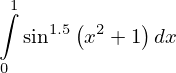

In [24]:
e = Integral(sin(1+x**2)**(3/2), (x,0,1))
e

In [25]:
e.n()

In [26]:
#c
def integralC(n):
    suma = 0
    xo = 6789
    [Ii,xi, ui] = genranN(25214903917, 11, (2**48)-1, xo, n)
    for i in range(n):
        xx = ui[i]
        y = (math.sqrt(((math.sin(1+xx**2))**3)))
        suma+=y
    return suma/n
    #print("Aproximación de MonteCarlo : ",suma/n)

vlr_real = e.n()
print("Valor real="+str(vlr_real))
arr=[100,1000,10000]
for i in range(0,len(arr)):
    n=arr[i]
    vlr_medido=integralC(n)
    print("N="+str(n)+"\t"+"Aprox. MC="+str(vlr_medido)+"\t error relativo porc.="+str(error_relativo_porcentual(vlr_real, vlr_medido)))

Valor real=0.896282156377612
N=100	Aprox. MC=0.8803745810129968	 error relativo porc.=1.77484012723259
N=1000	Aprox. MC=0.8934084491806973	 error relativo porc.=0.320625282615156
N=10000	Aprox. MC=0.8968568735719155	 error relativo porc.=0.0641223514507979


**3)** Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria $X$ de un dado de 8 lados: $X = {1,2,3,4,5,6,7,8}$, $p(X) = {0.11,0.3,0.12,0.2,0.05,0.07,0.05,0.10}$, ¿Qué valores retornaría el generador de variables aleatorias por el método de la inversión si los números aleatorios generados son: $U = {0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344}$?

In [213]:
U = [0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344]
X = [1,2,3,4,5,6,7,8]
p = [0.11,0.3,0.12,0.2,0.05,0.07,0.05,0.10]
P = np.cumsum(p)
print(U)
print(X)
print(P)
V=genvardiscret(U,X,P)
print(V)

[0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344]
[1, 2, 3, 4, 5, 6, 7, 8]
[0.11 0.41 0.53 0.73 0.78 0.85 0.9  1.  ]
[2, 8, 6, 4, 1, 2, 4, 8, 2, 4]


**4)** Responda las siguientes preguntas:

**(a)** Nombre dos distribuciones de probabilidad discreta.

_Rta:_
    Bernoulli, Binomial, Poisson
    
**(b)** ¿Cuáles son los parámetros de la distribución de probabilidad normal?

_Rta:_
    $\mu$ y $\sigma$

**(c)** ¿Cuál es el valor esperado de una distribución de probabilidad uniforme continua que esta definida en el intervalo de 2 a 12? 

_Rta:_
    (2+12)/2 = 14/2 = 7

**5)** Utilizando el metodo de Monte Carlo, y tomando como base el ejemplo del calculo del área del circulo visto en clase y del taller 3 con sus propios generadores congruenciales:

**(a)** Implemente el metodo de Monte Carlo para calcular y mostrar el área estimada de una elipse con un semieje mayor $a = 13$ y semieje menor $b = 6$ centrado en el origen $x, y = (0, 0)$ generando 1000 coordenadas aleatorias $(X, Y)$ en el rango de
$X = [−a, a]$ y $Y = [−b, b]$.<br>
**(b)** Calcule el area real de la elipse.<br>
**(c)** Calcule la diferencia entre el área real y el área estimada de la elipse con el método de Monte Carlo<br>
**(d)** Grafique los puntos aleatorios generados que caen dentro de la elipse en rojo y los que caen fuera de la elipse en azul.

_Rta.:_

La ecuación de la elipse es:

$\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1$

La formula para calcular el área de la elipse es: $Area = \pi \cdot  a \cdot  b$
<center>
<a href="https://www.google.com.co/search?rlz=1C5CHFA_enCO801CO801&ei=zLm6W-CfHoGb5wK45LWgDQ&q=ellipse+area&oq=ellipse+area&gs_l=psy-ab.3...0.0.0.5609.0.0.0.0.0.0.0.0..0.0....0...1..64.psy-ab..0.0.0....0.lP8_dbePDHE">https://www.google.com.co/search?rlz=1C5CHFA_enCO801CO801&ei=zLm6W-CfHoGb5wK45LWgDQ&q=ellipse+area&oq=ellipse+area&gs_l=psy-ab.3...0.0.0.5609.0.0.0.0.0.0.0.0..0.0....0...1..64.psy-ab..0.0.0....0.lP8_dbePDHE</a>
</center>

In [214]:
a=13
b=6
N = 1000

In [215]:
nElipse = 0
nNElipse = 0
X=[]
Y=[]
Xr=[]
Yr=[]
Xb=[]
Yb=[]
for i in range(1, N+1):
    Ux = np.random.rand()
    Uy = np.random.rand()
    X.append(2*a*Ux-a)
    Y.append(2*b*Uy-b)
    I = (X[i-1]**2)/(a**2) + (Y[i-1]**2)/(b**2)
    if I <= 1:
        nElipse = nElipse + 1
        Xr.append(X[i-1])
        Yr.append(Y[i-1])
    else:
        nNElipse = nNElipse +1
        Xb.append(X[i-1])
        Yb.append(Y[i-1])

AreaElipseMC = (float(nElipse)/ float(N))*((4*b*a))
print("a) Area estimada elipse con MC: ", AreaElipseMC)

a) Area estimada elipse con MC:  245.232


In [216]:
AreaElipseReal = np.pi*a*b

print("b) Calcule el área real de la elipse.",AreaElipseReal)

b) Calcule el área real de la elipse. 245.04422698000388


/Users/angelcruz-roa/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))



c) Calcule la diferencia entre el área real y el área estimada con el método de Monte Carlo

Area Real = 245.04422698000388 Area Estimada= 245.232 Error = 0.18777301999611495

d) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul 


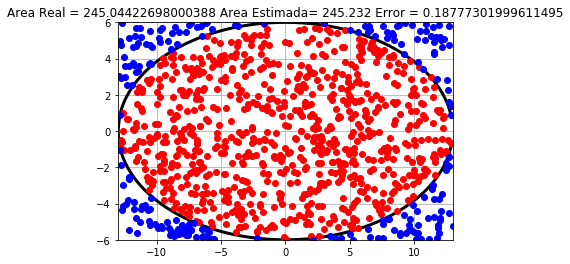

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-float(a),float(a),float(a)/100.0)
#x.append(1)
y1=[]
y2=[]
for i in x:
    n = np.sqrt((1-((i**2)/a**2))*b**2)
    y1.append(n)
    y2.append(-n)
    
plt.plot(x,y1,color="black",lw=3)
plt.plot(x,y2,color="black",lw=3)
plt.ylim(-(b), b)
plt.xlim(-(a), a)
plt.grid(True) 

plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )
titulo = "Area Real = "+str(AreaElipseReal)+" Area Estimada= "+str(AreaElipseMC)+" Error = "+str(np.abs(AreaElipseReal-AreaElipseMC))
print("\nc) Calcule la diferencia entre el área real y el área estimada con el método de Monte Carlo\n")
print(titulo)
print("\nd) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul ")
plt.title(titulo)
plt.show()